Borrador con las pruebas para la creacion del codigo 1_CreacionDatasetCV2.ipynb

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Define functions

# Sort landmarks
def angle_from_reference(point, reference):
    x, y = point[0] - reference[0], point[1] - reference[1]
    return math.atan2(y, x)

def sort_points_clockwise(points):
    reference_point = min(points, key=lambda p: p[1])
    sorted_points = sorted(points, key=lambda p: angle_from_reference(p, reference_point))
    return sorted_points

def masked_heatmap(outline, landmarks):
    masked_heatmaps = []
    for i in range(len(landmarks)):
        outline = outline / 255.0
        masked_heatmap_i = outline * landmarks[i]  # Create a new array instead of modifying 'outline'
        
        max_val = np.max(landmarks[i])
        masked_heatmap_i = masked_heatmap_i / max_val

        masked_heatmaps.append(masked_heatmap_i)  # Append the new array to the list

    return masked_heatmaps

def extract_landmarks(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    perimeter = cv2.arcLength(largest_contour, closed=True)
    mindis = perimeter / (landmark_number * 2)

    corners = cv2.goodFeaturesToTrack(image, maxCorners=7, qualityLevel=0.01, minDistance=mindis)
    keypoints = [cv2.KeyPoint(x[0][0], x[0][1], 2) for x in corners]
    landmarks = [(int(keypoint.pt[0]), int(keypoint.pt[1])) for keypoint in keypoints]
    sorted_landmarks = sort_points_clockwise(landmarks)
    return sorted_landmarks

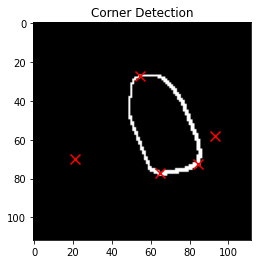

In [4]:


#54.359375  27.380208 73.135417  75.687500
#51.710748  29.863296  58.941308  27.052927
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = '/home/alanr/Documents/Corazon/Data/train/mask/0X100E3B8D3280BEC5_25.png'
image = cv2.imread(image_path, 0)  # 0 indicates grayscale

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Corner Detection')

# Plot the point (54.359375, 27.380208) on the image
plt.scatter([54.359375], [27.380208], color='red', marker='x', s=100)
plt.scatter([64.619162], [77.176429], color='red', marker='x', s=100)
plt.scatter([84.155579], [72.490272], color='red', marker='x', s=100)
plt.scatter([93], [58], color='red', marker='x', s=100)
plt.scatter([21], [70], color='red', marker='x', s=100)
# Create a heatmap with a filled circle at the landmark position
heatmap = np.zeros_like(image, dtype=np.float32)
#cv2.circle(heatmap, (int(73.135417), int(112-75.687500)), 2, 1, -1)

# Show the heatmap
#plt.imshow(heatmap, cmap='jet')  # Add alpha to make the heatmap partially transparent


# Show the plot
plt.show()



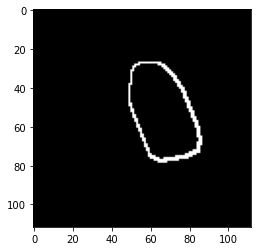

In [5]:
plt.imshow(image, cmap='gray')

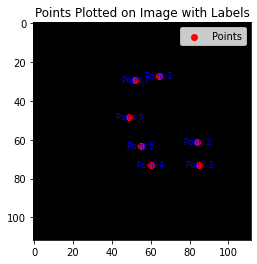

In [6]:
import matplotlib.pyplot as plt

# Define the points
points = [(64, 27), (84, 61), (85, 73), (60, 73), (55, 63), (49, 48), (52, 29)]

# Create an image of size 112x112
image_size = 112
image = np.zeros((image_size, image_size), dtype=np.uint8)

# Plot the points on the image
for i, point in enumerate(points):
    x, y = point
    # Ensure the point is within the image bounds
    if 0 <= x < image_size and 0 <= y < image_size:
        image[y, x] = 255  # Set pixel intensity to 255 (white)
        plt.text(x, y, f'Point {i + 1}', color='blue', fontsize=8, ha='center', va='center')

# Display the image with the plotted points and labels
plt.imshow(image, cmap='gray')
plt.scatter(*zip(*points), color='red', marker='o', label='Points')
plt.title('Points Plotted on Image with Labels')
plt.legend()
plt.show()


In [7]:
from PIL import Image, ImageDraw
import numpy as np

def convert_white_to_black(image_path, point1, point2):
    # Open the image
    img = cv2.imread(image_path, 0)

    # Create a NumPy array from the image for easier manipulation
    img_array = np.array(img)
    
    # Get image dimensions
    height, width = img_array.shape

    # Iterate through each pixel
    for x in range(point1[0], min(point2[0], width)):
        for y in range(height):
            # Check if the pixel is white
            if img_array[y, x] == 255:
                # Check if the pixel is to the right of the line formed by point1 and point2
                angle = np.arctan2(point2[1] - point1[1], point2[0] - point1[0])
                current_angle = np.arctan2(y - point1[1], x - point1[0])
                
                if current_angle >= angle:
                    # Convert white pixel to black
                    img_array[y, x] = 0

    # Convert the NumPy array back to an image
    result_img = Image.fromarray(img_array)

    # Save the modified image
    result_img.save("output_image.png")

# Example usage
image_path = '/home/alanr/Documents/Corazon/Data/train/mask/0X100E3B8D3280BEC5_25.png'
point1 = (int(54.359375), int(27.380208))  # Replace with the coordinates of your first point
point2 = (int(64.619162), int(77.176429))  # Replace with the coordinates of your second point

convert_white_to_black(image_path, point1, point2)


In [8]:
import math
#R

def get_point(x1, y1, x2, y2):
    #express coordinates of the point (x2, y2) with respect to point (x1, y1)
    dx = x2 - x1
    dy = y2 - y1

    alpha = 30./180*math.pi
    #rotate the displacement vector and add the result back to the original point
    xp = x1 + math.cos( alpha)*dx + math.sin(alpha)*dy
    yp = y1 + math.sin(-alpha)*dx + math.cos(alpha)*dy

    return (xp, yp)


print(get_point(54, 27, 64, 77))

(87.66025403784438, 65.30127018922194)


In [9]:
#L
def get_point(x1, y1, x2, y2):
    #express coordinates of the point (x2, y2) with respect to point (x1, y1)
    dx = x2 - x1
    dy = y2 - y1

    alpha = -70./180*math.pi
    #rotate the displacement vector and add the result back to the original point
    xp = x1 + math.cos( alpha)*dx + math.sin(alpha)*dy
    yp = y1 + math.sin(-alpha)*dx + math.cos(alpha)*dy

    return (xp, yp)


print(get_point(54, 27, 84, 72))

(21.97443636440419, 70.58168507323234)


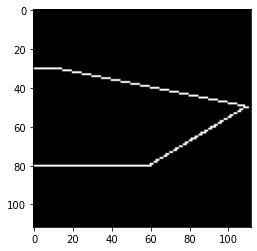

In [10]:
#NS
import numpy as np
import matplotlib.pyplot as plt

# Define the points
point1 = (10, 30)
point2 = (60, 80)
point3 = (110, 50)

# Create a blank image with black background
width, height = 112, 112
image = np.zeros((height, width), dtype=np.uint8)

# Create arrays for the lines passing through point1 and point3, and point2 and point3
line1 = np.linspace(point1, point3, num=100).astype(int)
line2 = np.linspace(point2, point3, num=100).astype(int)
line3 = np.linspace(point2, (0, point2[1]), num=100).astype(int)
line4 = np.linspace(point1, (0, point1[1]), num=100).astype(int)

# Fill the area inside the lines with white color
image[line1[:, 1], line1[:, 0]] = 255
image[line2[:, 1], line2[:, 0]] = 255
image[line3[:, 1], line3[:, 0]] = 255
image[line4[:, 1], line4[:, 0]] = 255

# Plot the image
plt.imshow(image, cmap='gray')
plt.show()


<class 'tuple'>


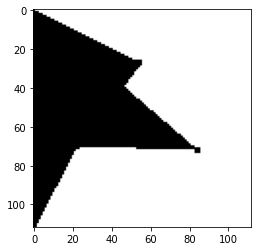

In [43]:
#R
from PIL import Image, ImageDraw

# Define the points
point1 = (54, 27)
print(type(point1))    
point2 = (84, 72)
point3 = (22, 70)

# Create a blank image with white background
width, height = 112, 112
imageRightFirst = Image.new("L", (width, height), "white")
draw = ImageDraw.Draw(imageRightFirst)

# Draw lines passing through point1 and point3, and point2 and point3
draw.line([point1, point3], fill="black", width=2)
draw.line([point2, point3], fill="black", width=2)



# Fill the area to the left of the lines with black color
draw.polygon([point1, point3, (0, height), (0, 0)], fill="black")
draw.polygon([point2, point3, (0, height), (0, 0)], fill="black")
#imageRightFirst = Image.eval(imageRightFirst, lambda x: 255.0 - x)

# Draw 3x3 white pixel squares with the given points as the center
draw.rectangle([point1[0]-1, point1[1]-1, point1[0]+1, point1[1]+1], fill="black")
draw.rectangle([point2[0]-1, point2[1]-1, point2[0]+1, point2[1]+1], fill="black")
draw.rectangle([point3[0]-1, point3[1]-1, point3[0]+1, point3[1]+1], fill="black")

# Save or display the resulting image

plt.imshow(imageRightFirst, cmap='gray')
plt.show()


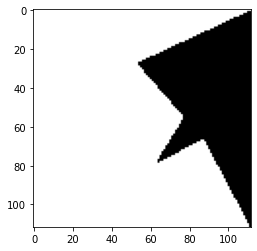

In [34]:
#L
#R
from PIL import Image, ImageDraw

# Define the points
point1 = (54, 27)
point2 = (64, 77)
point3 = (87, 65)

# Create a blank image with white background
width, height = 112, 112
image = Image.new("L", (width, height), "white")
draw = ImageDraw.Draw(image)

# Draw lines passing through point1 and point3, and point2 and point3
draw.line([point1, point3], fill="black", width=2)
draw.line([point2, point3], fill="black", width=2)

# Fill the area to the right of the lines with black color
draw.polygon([point1, point3, (width, height), (width, 0)], fill="black")
draw.polygon([point2, point3, (width, height), (width, 0)], fill="black")

# Save or display the resulting image
image.save("output_image.png")
#image.show()
np.savetxt('222222222222', image, fmt='%f', delimiter='\t')
plt.imshow(image, cmap='gray')
plt.show()


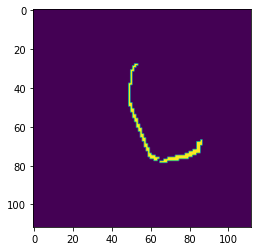

In [35]:
from PIL import Image

def multiply_images(image_path1, image_path2, output_path):
    # Open the images
    img1 = Image.open(image_path1).convert("L")  # Convert to grayscale if not already
    img2 = Image.open(image_path2).convert("L")

    # Ensure both images have the same size
    if img1.size != img2.size:
        raise ValueError("Images must have the same size")

    # Get the pixel data for both images
    pixels1 = list(img1.getdata())
    pixels2 = list(img2.getdata())

    # Multiply corresponding pixel values
    multiplied_pixels = [p1 * p2 // 255 for p1, p2 in zip(pixels1, pixels2)]

    # Create a new image with the multiplied pixel values
    result_image = Image.new("L", img1.size)
    result_image.putdata(multiplied_pixels)

    # Save the result image
    result_image.save(output_path)
    plt.imshow(result_image)
    plt.show()

# Example usage:
image_path1 = "/home/alanr/Documents/Corazon/output_image.png"
image_path2 = "/home/alanr/Documents/Corazon/Data/train/mask/0X100E3B8D3280BEC5_25.png"
output_path = "lineL.png"

multiply_images(image_path1, image_path2, output_path)


(112, 112)
(112, 112)


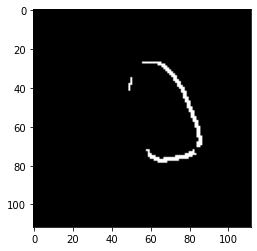

In [44]:
from PIL import Image

def multiply_images(image_path1, image_path2, output_path):
    # Open the images
    img1 = imageRightFirst  # Convert to grayscale if not already
    
    img2 = Image.open(image_path2).convert("L")
    print(img1.size)
    print(img2.size)

    # Ensure both images have the same size
    if img1.size != img2.size:
        raise ValueError("Images must have the same size")

    # Get the pixel data for both images
    pixels1 = list(img1.getdata())
    
    pixels2 = list(img2.getdata())


    # Multiply corresponding pixel values
    multiplied_pixels = [p1 * p2 // 255 for p1, p2 in zip(pixels1, pixels2)]

    # Create a new image with the multiplied pixel values
    result_image = Image.new("L", img1.size)
    result_image.putdata(multiplied_pixels)

    # Save the result image
    result_image.save(output_path)
    plt.imshow(result_image, cmap='gray')
    plt.show()
    return result_image

# Example usage:
image_path1 = "/home/alanr/Documents/Corazon/output_image2.png"
image_path2 = "/home/alanr/Documents/Corazon/Data/train/mask/0X100E3B8D3280BEC5_25.png"
output_path = "lineR.png"

result_image = multiply_images(image_path1, image_path2, output_path)


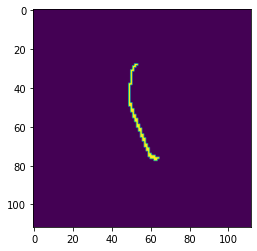

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('/home/alanr/Documents/Corazon/lineL.png', cv2.IMREAD_GRAYSCALE)

# Connected Component Analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)

# Find the largest connected component (excluding the background)
largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1  # +1 to skip the background label

# Create a new image with only the largest component
largest_component_image = np.zeros_like(image)
largest_component_image[labels == largest_component_label] = 255

# Save or display the result
cv2.imwrite('largest_component.png', largest_component_image)
plt.imshow(largest_component_image)
plt.show()


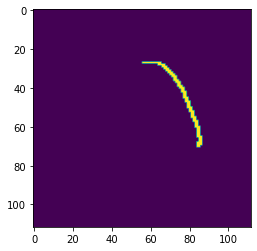

In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread('/home/alanr/Documents/Corazon/lineR.png', cv2.IMREAD_GRAYSCALE)

# Connected Component Analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)

# Find the largest connected component (excluding the background)
largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1  # +1 to skip the background label

# Create a new image with only the largest component
largest_component_image = np.zeros_like(image)
largest_component_image[labels == largest_component_label] = 255

# Save or display the result
plt.imshow(largest_component_image)
plt.show()


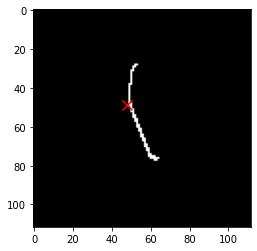

In [60]:
import cv2
import numpy as np

# Load the image
image = largest_component_image

# Apply preprocessing (e.g., Gaussian blur)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

epsilon = 0.04 * cv2.arcLength(contours[0], True)
approx = cv2.approxPolyDP(contours[0], epsilon, True)

curvature = np.abs(np.gradient(np.gradient(approx[:, 0, 1])) / np.gradient(np.gradient(approx[:, 0, 0])))

max_curvature_index = np.argmax(curvature[1:-1]) + 1  # Exclude start and end points

max_curvature_point = tuple(approx[max_curvature_index][0])

# Plot the original image
plt.imshow(image, cmap='gray')

# Mark the point of highest curvature
plt.scatter(max_curvature_point[0], max_curvature_point[1], c='red', marker='x', s=100)

# Show the plot
plt.show()


[[84. 70.]]
[[56. 27.]]
[[82. 54.]]
[[76. 40.]]


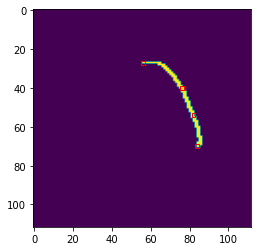

In [87]:
#Formula = ((max(y) - min(y))/4) + 2
import matplotlib.patches as patches
corners = cv2.goodFeaturesToTrack(largest_component_image, maxCorners=4, qualityLevel=0.01, minDistance=14)
# Create a figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(largest_component_image)

# Plot the points as red squares
for point in corners:
    print(point)
    x, y = point[0]
    rect = patches.Rectangle((x - 1, y - 1), 2, 2, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Show the plot
plt.show()
